# DECLINE CURVE ANALYSIS ON VOLVE FIELD DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#import data
df=pd.read_csv(r'C:\Users\Administrator\Downloads\norne_production_rate_sample.csv',index_col=0,parse_dates=True)

In [53]:
#get the head of the dataset
df.head()

,Rate (SCF/d)
Date,
2004-04-01,2706039.0
2004-05-01,2492086.2
2004-06-02,1816846.1
2004-07-02,1920207.4
2004-07-04,1683521.4


In [23]:
#Change pandas set options
pd.set_option('Display.max_rows',None)
pd.set_option('Display.max_columns',None)

In [54]:
df.head()

,Rate (SCF/d)
Date,
2004-04-01,2706039.0
2004-05-01,2492086.2
2004-06-02,1816846.1
2004-07-02,1920207.4
2004-07-04,1683521.4


In [10]:
from scipy.optimize import curve_fit
import math

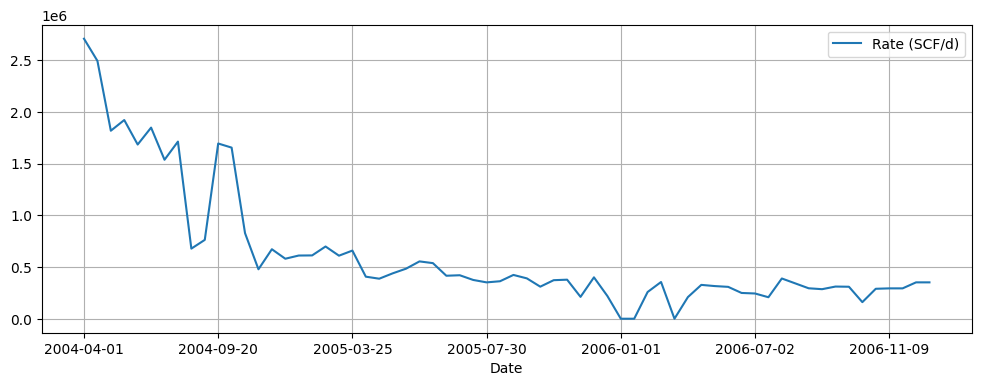

In [28]:
df.plot(figsize=(12,4))
plt.grid()

In [59]:
def day_maker (df):
    days=[]
    for d in range(len(df)):
        delta=df.index[d]-df.index[0]
        days.append(delta.days)
    days=np.array(days)
    return days

In [60]:
df['days']=day_maker(df)

In [61]:
df.head()

,Rate (SCF/d),days
Date,,
2004-04-01,2706039.0,0
2004-05-01,2492086.2,30
2004-06-02,1816846.1,62
2004-07-02,1920207.4,92
2004-07-04,1683521.4,94


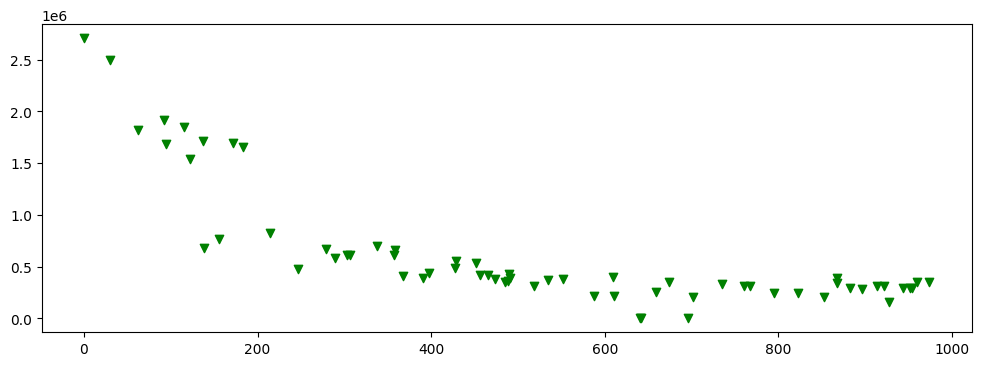

In [63]:
plt.figure(figsize=(12,4))
plt.scatter(x='days',y='Rate (SCF/d)',data=df,color='g',marker='v')
plt.show()

In [64]:
def q_hyp(t,qi,b,d):
    qfit=qi/(np.abs((1+b*d*t))**(1/b))
    return qfit

def hyp_fitter(q,t):
    #first we have to normalize so that it converges well and quick
    q_n=q/max(q)
    t_n=t/max(t)
    
    #curve-fit (optimization of parameters)
    params=curve_fit(q_hyp,t_n,q_n)
    [qi,b,d]=params[0]
    
    #These are for normalized t and q.
    #we must re-adjust for q and t(non-normalized)
    
    d_f=d/max(t)
    qi_f=qi*max(q)
    
    #Now we can use these parameters
    q_hyp_fit=q_hyp(t,qi_f,b,d_f)
    
    return q_hyp_fit,params
    

In [65]:
q=df['Rate (SCF/d)']
t=df['days']
q_fit,params=hyp_fitter(q,t)

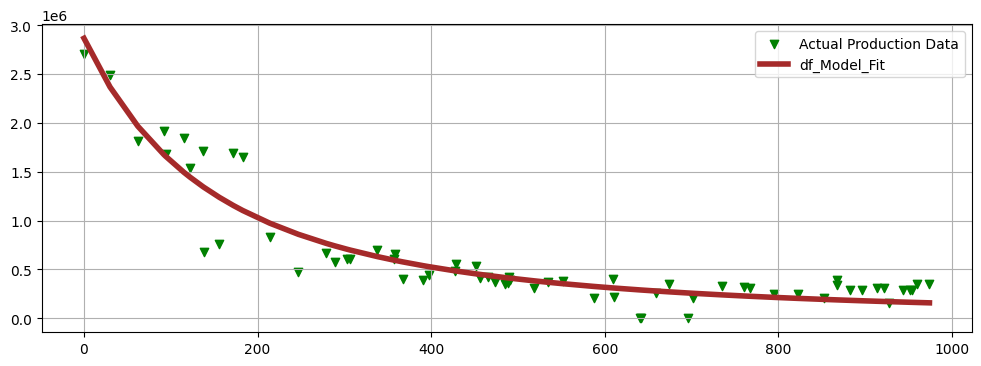

In [67]:
plt.figure(figsize=(12,4))
plt.scatter(t,q,marker='v',color='green',label='Actual Production Data')
plt.plot(t,q_fit,color='brown',lw=4,label='df_Model_Fit')
plt.grid()
plt.legend()